In [138]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from math import sin, cos
import numpy as np
import cv2

In [69]:
root = ET.parse('../data/raw/pacaba/GeneralCarsDataset/Image1/Annotations/000002.xml').getroot()

In [172]:
obj = root.findall('object')[0]
bndbox = obj.find('bndbox')

In [173]:
xcenter = float(bndbox.find('xcenter').text)
ycenter = float(bndbox.find('ycenter').text)
height = float(bndbox.find('height').text)
width = float(bndbox.find('width').text)
orientation = float(bndbox.find('orientation').text)

In [174]:
orientation = math.radians(orientation)

In [175]:
# center_up_x = xcenter + math.sin(math.radians(orientation)) / (height / 2)
# center_up_y = ycenter + math.cos(math.radians(orientation)) / (height / 2)

# left_up_x = center_up_x - math.sin(math.radians(45)) / (width / 2)
# left_up_y = center_up_y + math.cos(math.radians(45)) / (width / 2)

# right_up_x = center_up_x + math.sin(math.radians(45)) / (width / 2)
# right_up_y = center_up_y - math.cos(math.radians(45)) / (width / 2)

# left_down_x = left_up_x - 2 * math.sin(math.radians(orientation)) / (height / 2)
# left_down_y = left_up_y - 2 * math.cos(math.radians(orientation)) / (height / 2)

# right_down_x = right_up_x - 2 * math.sin(math.radians(orientation)) / (height / 2)
# right_down_y = right_up_y - 2 * math.cos(math.radians(orientation)) / (height / 2)

top_right_x = int(xcenter + ((width / 2) * cos(orientation)) - ((height / 2) * sin(orientation)))
top_right_y = int(ycenter + ((width / 2) * sin(orientation)) + ((height / 2) * cos(orientation)))

top_left_x = int(xcenter - ((width / 2) * cos(orientation)) - ((height / 2) * sin(orientation)))
top_left_y = int(ycenter - ((width / 2) * sin(orientation)) + ((height / 2) * cos(orientation)))

bot_left_x = int(xcenter - ((width / 2) * cos(orientation)) + ((height / 2) * sin(orientation)))
bot_left_y = int(ycenter - ((width / 2) * sin(orientation)) - ((height / 2) * cos(orientation)))

bot_right_x = int(xcenter + ((width / 2) * cos(orientation)) + ((height / 2) * sin(orientation)))
bot_right_y = int(ycenter + ((width / 2) * sin(orientation)) - ((height / 2) * cos(orientation)))

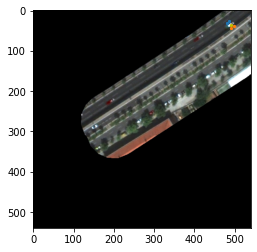

In [176]:
img = mpimg.imread('../data/raw/pacaba/GeneralCarsDataset/Image1/Images_Masked/000002.jpg')
imgplot = plt.imshow(img)
plt.scatter(xcenter, ycenter, color='y', s=5)
plt.scatter([top_left_x, top_right_x], [top_left_y, top_right_y], s=5)
plt.scatter([bot_left_x, bot_right_x], [bot_left_y, bot_right_y], s=5)
plt.show()

In [177]:
img = cv2.imread('../data/raw/pacaba/GeneralCarsDataset/Image1/Images_Masked/000002.jpg')
# points for test.jpg
cnt = np.array([
        [[bot_left_x, bot_left_y]],
        [[top_left_x, top_left_y]],
        [[top_right_x, top_right_y]],
        [[bot_right_x, bot_right_y]]
    ])
print("shape of cnt: {}".format(cnt.shape))
rect = cv2.minAreaRect(cnt)
print("rect: {}".format(rect))

# the order of the box points: bottom left, top left, top right,
# bottom right
box = cv2.boxPoints(rect)
box = np.int0(box)

print("bounding box: {}".format(box))
cv2.drawContours(img, [box], 0, (0, 0, 255), 2)

# get width and height of the detected rectangle
width = int(rect[1][0])
height = int(rect[1][1])

src_pts = box.astype("float32")
# coordinate of the points in box points after the rectangle has been
# straightened
dst_pts = np.array([[0, height-1],
                    [0, 0],
                    [width-1, 0],
                    [width-1, height-1]], dtype="float32")

# the perspective transformation matrix
M = cv2.getPerspectiveTransform(src_pts, dst_pts)

# directly warp the rotated rectangle to get the straightened rectangle
warped = cv2.warpPerspective(img, M, (width, height))

# cv2.imwrite("crop_img.jpg", warped)
cv2.waitKey(0)

shape of cnt: (4, 1, 2)
rect: ((489.5, 34.5000114440918), (7.164087295532227, 17.85149574279785), -40.23636245727539)
bounding box: [[492  43]
 [481  30]
 [486  25]
 [498  39]]


-1

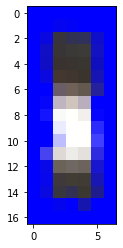

In [178]:
plt.imshow(warped)